# Definition de la classe Arbre Binaire

In [24]:
import graphviz as gv
import math as m
import os as file

class ArbreBinaire:
    def __init__(self):
        self.pere = None # Arbre Binaire Parent
        self.ssAG = None # ArbreBinaire Gauche 
        self.ssAD = None # ArbreBinaire Droit 
        self.cle = None # clé de l'arbre
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return ((self.ssAG == None) and (self.ssAD == None));
    
    def ajoute_fils(self,ssAG,ssAD,cle):
        """ ssAG, ssAD: 2 arbres binaires
        """
        self.ssAG = ssAG
        self.ssAD = ssAD
        self.cle  = cle
        self.setPere()
    
    def getPere(self):
        return self.pere
    
    def setPere(self):
        self.ssAG.pere = self
        self.ssAD.pere = self
    
    def getCle(self):
        return self.cle
    
    def getGauche(self):
        return self.ssAG
    
    def getDroite(self):
        return self.ssAD
    
    def setCle(self, cle):
        self.cle = cle
    
    def setLeft(self,newleft):
        self.ssAG = newleft
            
    def setRight(self,newright):
        self.ssAD = newright
    
    def swap_right(self):
        cle_droite = self.getDroite().getCle()
        self.getDroite().setCle(self.getCle())
        self.setCle(cle_droite)
    
    def swap_left(self):
        cle_gauche = self.getGauche().getCle()
        self.getGauche().setCle(self.getCle())
        self.setCle(cle_gauche)
        
    
    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.to_graph(gtree,str(self.cle))
    
    def to_graph(self, g,prefixe):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.cle),shape='ellipse')
        else:
            g.node(prefixe,str(self.cle),shape='ellipse')
            self.ssAG.to_graph(g,prefixe+"g")
            self.ssAD.to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g")
            g.edge(prefixe,prefixe+"d")
        return g

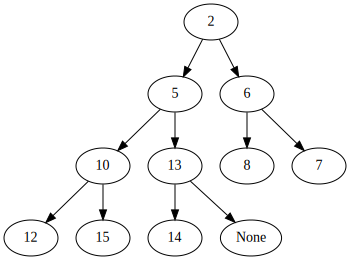

In [24]:
A = ArbreBinaire()
A_1 = ArbreBinaire()
A_2 = ArbreBinaire()
A_3 = ArbreBinaire()
A_4 = ArbreBinaire()
A_5 = ArbreBinaire()
A_1.setCle(12)
A_2.setCle(15)
A_3.setCle(14)
A_4.setCle(8)
A_5.setCle(7)
A_6 = ArbreBinaire()
A_6.ajoute_fils(A_4,A_5,6)

A_10 = ArbreBinaire()
A_10.ajoute_fils(A_1,A_2,10)
A_13 = ArbreBinaire()
A_13.ajoute_fils(A_3,ArbreBinaire(),13)

A_G = ArbreBinaire()

A_G.ajoute_fils(A_10,A_13,5)
A.ajoute_fils(A_G,A_6,2)
A.plot()

## Suppression du minimum

### Arbres:

In [20]:
def p_largeur(A):
    
    coucheCourant = list()
    coucheFils = list()
    l = list()
    coucheCourant.append(A)
    
    while(not(len(coucheCourant)==0)):
        
        for a in coucheCourant:
            if(a.est_feuille()):
                break
            if(a.getGauche() != None):
                coucheFils.append(a.getGauche())
            if(a.getDroite() != None):
                coucheFils.append(a.getDroite())
                
        l.append(coucheCourant[0])
        coucheCourant.pop(0)
        
        for a in coucheFils:
            if(not( a in coucheCourant)):
                coucheCourant.append(a)
        
        coucheFils = list()
    return l

In [21]:
def swap_to_leaf(A):
    #reste de l'algo
    if not(A.est_feuille()):
        if (((A.getGauche().getCle())<(A.getDroite().getCle())) or
            (((A.getGauche().getCle())<(A.getCle())) and (A.getDroite().getCle() is None))):
            A.swap_left()
            swap_to_leaf(A.getGauche())
        else:
            A.swap_right()
            swap_to_leaf(A.getGauche())
        if ((A.getCle() is None) and (A.getDroite().getCle() is None)):
            A.swap_left()


        
        

def remove_element(A,elt):
    if not(A is None):
        if (A.getCle() == elt):
            A.setCle(None)
        remove_element(A.getGauche(),elt)
        remove_element(A.getDroite(),elt)
    
def first_last_swapping(A):
    l = p_largeur(A)
    keys = list()
    for i in l:
        keys.append(i.getCle())
    if keys[-1] is None:
        remove_element(A,keys[-2])
        A.setCle(keys[-2])
    else:
        remove_element(A,keys[-1])
        A.setCle(keys[-1])
    
    
def supprimer_minimum(A):
    #fonction qui swap le dernier element de l'arbre et la racine
    print("rentreeeee")
    first_last_swapping(A)
    
    swap_to_leaf(A)


rentreeeee


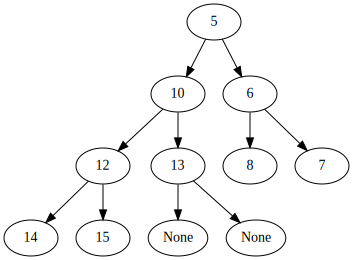

In [232]:
supprimer_minimum(A)
A.plot()

### Listes

In [6]:
def supprimer_minimum_liste(l):
    l.pop(0)
    i = 0
    n = len(l)
    while(i<m.log(n,2)):
        indice_fils_1 = 2*i + 1
        indice_fils_2 = 2*i + 2
        
        z = min(l[indice_fils_1],l[indice_fils_2],l[i])
        
        if not(z == l[i]):
            temp = l[l.index(z)]
            l[l.index(z)] = l[i] 
            l[i] = temp
        i =  i + 1
        
    

In [21]:
l = [ 2,5,6,10,13,8,7,12,15,14]
supprimer_minimum_liste(l)

In [22]:
l

[5, 6, 7, 13, 8, 10, 12, 15, 14]

# La fonction Ajout

In [254]:
def ajout_naif(A,x):
    if A is None:
        return 0
    
    if A.getCle() is None:
        print("hiiii")
        A.setCle(x)
        return 1
    if not(A.est_feuille()):
        if A.getGauche() is None:
            #print(A.getCle())
            print("biiiiii")
            a = ArbreBinaire()
            a.setCle(x)
            A.setLeft(a)
            return 1
        if A.getDroite() is None:
            print("boom")
            a = ArbreBinaire()
            a.setCle(x)
            A.setLeft(a)
            return 1
    else:
        a = ArbreBinaire()
        a.setCle(x)
        A.setLeft(a)
        b = ArbreBinaire()
        A.setRight(b)
        return 1
    if ajout_naif(A.getGauche(),x) == 1:
        return 1
    ajout_naif(A.getDroite(),x)

def swap_to_root(A):
     if not(A is None):
        if (not(A.est_feuille())):
            if (A.getGauche().getCle() < A.getCle()):
                print("swipe left ",A.getCle(),A.getDroite().getCle())
                A.swap_left()
            if (A.getDroite().getCle() < A.getCle() and not(A.getDroite().getCle() is None)):
                print("swipe right ||| gauche =",A.getGauche().getCle()," || centre = ",A.getCle()," || droite = ",A.getDroite().getCle())
                A.swap_right()
            swap_to_root(A.getGauche())
            swap_to_root(A.getDroite())

def respect_ordre(A):
    if not(A is None):
        if not(A.est_feuille()):
            print(A.getCle())
            if((A.getDroite().getCle() is None)):
                if not(A.getCle()<A.getGauche().getCle()):
                    print("ici . ")
                    return 0
                else:
                    return 1
            else:
                if (A.getCle()<A.getGauche().getCle() and A.getCle()<A.getDroite().getCle()):
                    return 1 * respect_ordre(A.getGauche()) * respect_ordre(A.getDroite())
                else:
                    return 0
            
        else:
            #print("ici")
            return 1


In [234]:
def ajout(A,x):
    ajout_naif(A,x)
    while(respect_ordre(A) != 1):
        swap_to_root(A)


In [235]:
ajout(A,2)
A.plot()

5
10
12
14
13
6


AttributeError: 'NoneType' object has no attribute 'getCle'

# La fonction ConsIter

In [25]:
#entrée: une liste d'elements
#Sortie : un min-heap

def consIter(l,i):
    n = len(l)
    a = ArbreBinaire()
    
    if (i<n and i>=(int(n-(m.log(n,2))))):
        #print("haha")
        a.setCle(l[i])
        return a
    
    if(i<n):
        a.ajoute_fils(consIter(l,(2*i)+1) , consIter(l,(2*i)+2) , l[i])
    return a 

In [ ]:
l = [2,5,6,12,10,8,7,14,15,13,None]
a = consIter(l,0)

In [ ]:
a.plot()

# Union de deux tas-min

In [334]:
def union(A1,A2):
    while(not(A2.getCle() is None)):
        head_A2 = A2.getCle()
        ajout(A1,head_A2)
        print("FIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIN")
        supprimer_minimum(A2)
        

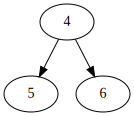

In [400]:
liste_A2 = [4,5,6]
A2 = consIter(liste_A2,0)
A2.plot()

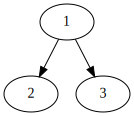

In [495]:
liste_A1 = [1,2,3]
A1 =  consIter(liste_A1,0)
A1.plot()

In [390]:
union(A1,A2)

1
2
FIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIN
rentreeeee
1
2
FIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIN
rentreeeee
1
2
FIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIN
rentreeeee


In [496]:
def ajouta_naif(A,x):
    if ( A.getCle() is None):
        A.setCle(x)
    else:
        q = list()
        q.append( A.getCle())
        while( not(len(q) == 0)):
            
    
    


In [501]:
def ajouta_naif(A,x):
    if not(A.est_feuille()):
        print("rentreee")
        if A.getGauche().getCle() is None:
            #print(A.getCle())
            print("biiiiii")
            a = ArbreBinaire()
            a.setCle(x)
            A.setLeft(a)
            return 1
        if A.getDroite().getCle() is None:
            print("boom")
            a = ArbreBinaire()
            a.setCle(x)
            A.setRight(a)
            return 1
        if (not(ajouta_naif(A.getGauche(),x) == 1)):
            ajouta_naif(A.getDroite(),x)
    else:
        print("zaaaab")
        a = ArbreBinaire()
        a.setCle(x)
        A.setLeft(a)
        b = ArbreBinaire()
        A.setRight(b)
        return 1
    
ajouta_naif(A1,6)

rentreee
rentreee
zaaaab
zaaaab


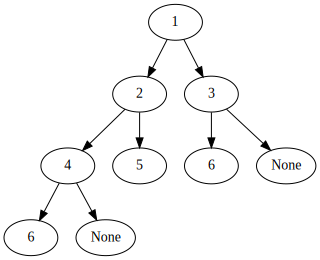

In [502]:
A1.plot()

# Ajout Tas Min (liste)

In [27]:
def ajout(liste, val):
    fils=len(liste)-1
    pere=int((fils-1)/2)
    liste[fils]=val
    while(pere>=0 and val<liste[pere]):
        liste[fils]=liste[pere] # père descend
        liste[pere]=val # valeur remonte
        fils=pere
        pere=int((fils-1)/2)
    liste.append(None)
    return liste

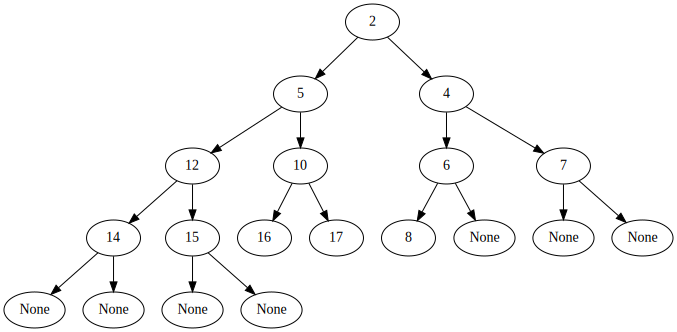

In [28]:
l = [2,5,6,12,10,8,7,14,15,13]
l = ajout(l,16)
a = consIter(l,0)
a.plot()
l = ajout(l,17)
a = consIter(l,0)
a.plot()
l = ajout(l,4)
a = consIter(l,0)
a.plot()

# Récupération fichier jeu de test

In [29]:
l = []
jeu_test_path = file.path.abspath("jeu_1_nb_cles_100.txt") # mettre le fichier txt au meme endroit que e fichier jupyter
f = open(jeu_test_path)
for line in f:
    l.append(line)
f.close()
#print(l) # afficher la liste l avec les données du fichier

['0x9c1f03a0d9cf510f2765bd0f226ff5dc\n', '0x10fd1015413104a2f26018d0ab77a727\n', '0x2e73d8ce4bd45923286e966bc8cf2d95\n', '0x767accd0c60c603f71a68be994019c7e\n', '0x34c63c08abab99722b945e57081288e7\n', '0x6d481adc2aeed025f0374a5982b5c23c\n', '0x1b6afe3e60638df54cf9bf49955311ea\n', '0xf3db49e4a326f6a8ec1fa2bc8a92c0e2\n', '0xe3f85a5d96997b24f8fa262c9f2dc1be\n', '0x7b1d9a5630ef94340401458fa21ebef8\n', '0x74ba951626ca154278b1018cee69012c\n', '0x9ac7768eb723ed721fda004e85a12a07\n', '0xe5d19320800277021db2174a860be73\n', '0x2959ab028da6dd5632ab7947fdaed8d4\n', '0xc83af8e2adeb62458914da62d24f05fe\n', '0x4ca119dd253b30c1657615676aba291f\n', '0x5cd39aeeb0f5eac017be93e1bfd1fb32\n', '0xc5db158ae4d52cbf4823c748816e92c6\n', '0xbe7753b8dcc5e1ffbf2492dd0a5c7210\n', '0x4462c0e73ee709f354916cfaf6fde491\n', '0xee43b5a98c00cc5b2a68cc6b253f3bd9\n', '0xfd063de053b90726cb0c950bf5c3c3a3\n', '0xb2ad0bb850f649ca61e18b62e05a1b1c\n', '0xc5011019c10e30a0b10afbe438e1292d\n', '0xfe264ec8f69d7b14d10486d0290f76b5\n', 